In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import time
import numpy as np
import pandas as pd
import pickle
import nltk
nltk.download("wordnet")
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /home/yuu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/yuu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yuu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
model = pickle.load(open("model.pckl",mode="rb"))
vectorizer = pickle.load(open("vectorizer.pckl",mode="rb"))
lemma = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

mail = "You have WON a $1000 Gift Card! Click the link to claim your $1000 gift card now: http://scam.com/claim."

In [3]:
mail = re.sub(r"http\S+", "", mail)
print(mail)

You have WON a $1000 Gift Card! Click the link to claim your $1000 gift card now: 


In [4]:
mail = re.sub("[^a-zA-Z0-9]"," ",mail)
print(mail)

You have WON a  1000 Gift Card  Click the link to claim your  1000 gift card now  


In [5]:
mail = mail.lower()
print(mail)

you have won a  1000 gift card  click the link to claim your  1000 gift card now  


In [6]:
mail = nltk.word_tokenize(mail)
print(mail)

['you', 'have', 'won', 'a', '1000', 'gift', 'card', 'click', 'the', 'link', 'to', 'claim', 'your', '1000', 'gift', 'card', 'now']


In [7]:
mail = [lemma.lemmatize(word) for word in mail]
print(mail)

['you', 'have', 'won', 'a', '1000', 'gift', 'card', 'click', 'the', 'link', 'to', 'claim', 'your', '1000', 'gift', 'card', 'now']


In [8]:
mail = [word for word in mail if word not in stopwords]
mail = " ".join(mail)
print(mail)

1000 gift card click link claim 1000 gift card


In [9]:
vector = vectorizer.transform([mail])
print(vector)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 20000)>
  Coords	Values
  (0, 103)	2
  (0, 3916)	2
  (0, 4405)	1
  (0, 4469)	1
  (0, 8433)	2
  (0, 11307)	1


In [10]:
def class_name(idx):
    return "Ham" if idx == 0 else "Spam"

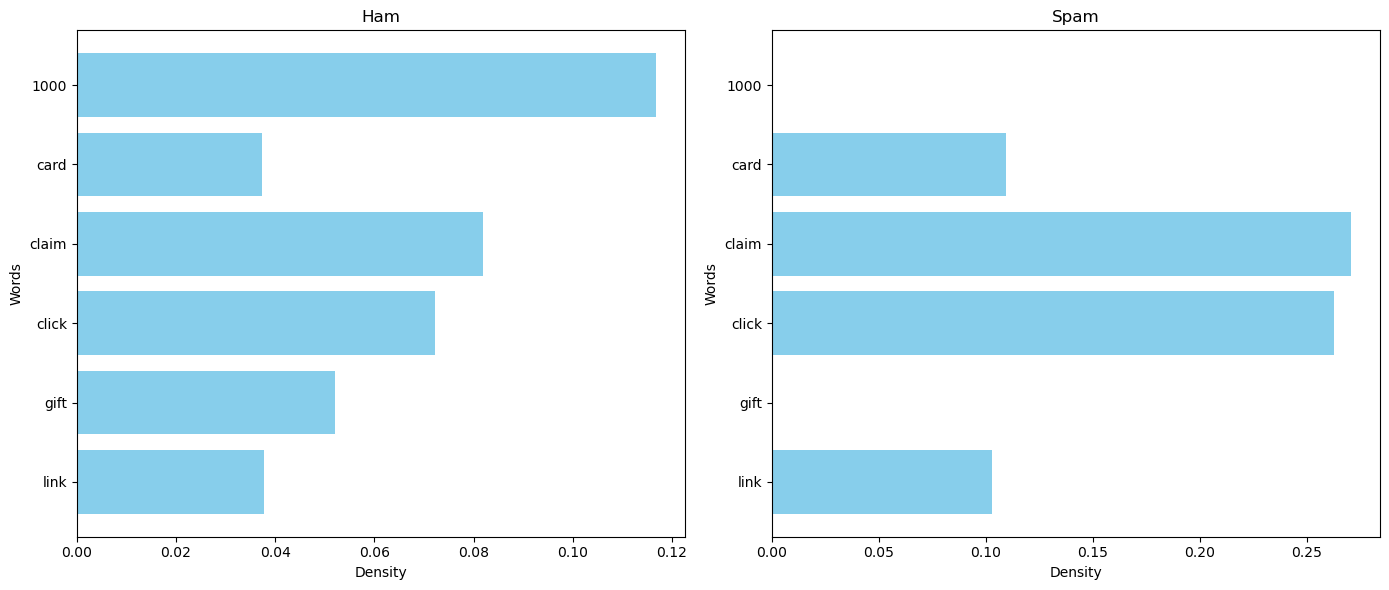

In [11]:
sample_vector = vector.toarray()[0]

theta = model.theta_
var = model.var_

def gaussian_pdf(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(- ((x - mean) ** 2) / (2 * var))

words = vectorizer.get_feature_names_out()

word_counts = {word: sample_vector[i] for i, word in enumerate(words) if sample_vector[i] > 0}

density_by_class = {}
for class_idx in range(model.theta_.shape[0]):
    densities = {}
    for word in word_counts:
        i = np.where(words == word)[0][0]
        x_val = sample_vector[i]
        mean = model.theta_[class_idx, i]
        var = model.var_[class_idx, i]
        density = gaussian_pdf(x_val, mean, var)
        densities[word] = density
    density_by_class[class_name(class_idx)] = densities

num_classes = len(density_by_class)
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(14, 6))

if num_classes == 1:
    axes = [axes]

for idx, (class_label, densities) in enumerate(density_by_class.items()):
    class_words = list(densities.keys())
    class_values = [densities[word] for word in class_words]

    axes[idx].barh(class_words, class_values, color='skyblue')
    axes[idx].set_title(class_name(idx))
    axes[idx].set_xlabel('Density')
    axes[idx].set_ylabel('Words')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

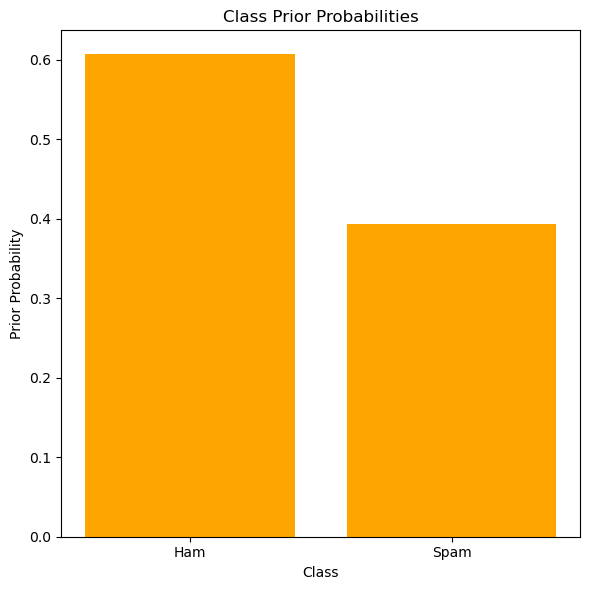

In [12]:
fig2, ax2 = plt.subplots(figsize=(6,6))
class_priors = model.class_prior_
class_labels = [class_name(i) for i in range(len(class_priors))]
ax2.bar(class_labels, class_priors, color='orange')
ax2.set_title('Class Prior Probabilities')
ax2.set_xlabel('Class')
ax2.set_ylabel('Prior Probability')

plt.tight_layout()
plt.show()


In [13]:
decision = model.predict(vector.toarray())
print(decision)

[1]
